<a href="https://colab.research.google.com/github/JordanMusera/deep_learning/blob/main/Convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline



In [42]:
#Convert MNIST image files into a tensor 4-Dimentions
transform = transforms.ToTensor()

In [43]:
#Train Data
train_data = datasets.MNIST(root='/cnn_data',train=True,download=True,transform = transform)
#Test Data
test_data = datasets.MNIST(root='/cnn_data',train=False,download=True,transform = transform)

In [44]:
#Create a small batch size of images
train_loader = DataLoader(train_data, batch_size=10,shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [45]:
#Define our CNN model
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

#Grab 1 MNIST record
for i,(X_Train,y_train) in enumerate(train_data):
  break

x = X_Train.view(1,1,28,28)

#Perform our first convolution
x = F.relu(conv1(x))
x.shape

torch.Size([1, 6, 26, 26])

In [46]:
#pass through the pooling layer
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 6, 13, 13])

In [47]:
#Do our second convolutional layer
x = F.relu(conv2(x))
x.shape

torch.Size([1, 16, 11, 11])

In [48]:
#Pooling layer
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 5, 5])

In [49]:
#Model class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    #Fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    #second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)
    #Re-view to flatten it out
    X = X.view(-1,16*5*5)

    #Fully connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)

In [50]:
#Create an instance of our model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [51]:
#Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [52]:
import time
start_time = time.time()

epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #Train
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    #Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Print out some results
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  #Test
  with torch.no_grad():#Disables gradient tracking because we're not training, just evaluating
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes')

Epoch: 0 Batch: 600 Loss: 0.1623610556125641
Epoch: 0 Batch: 1200 Loss: 0.1502392590045929
Epoch: 0 Batch: 1800 Loss: 0.4744560718536377
Epoch: 0 Batch: 2400 Loss: 0.14238706231117249
Epoch: 0 Batch: 3000 Loss: 0.007758188061416149
Epoch: 0 Batch: 3600 Loss: 0.3836284875869751
Epoch: 0 Batch: 4200 Loss: 0.0038223876617848873
Epoch: 0 Batch: 4800 Loss: 0.0021286322735249996
Epoch: 0 Batch: 5400 Loss: 0.0569545142352581
Epoch: 0 Batch: 6000 Loss: 0.00038789428072050214
Epoch: 1 Batch: 600 Loss: 0.005851339548826218
Epoch: 1 Batch: 1200 Loss: 0.3855525553226471
Epoch: 1 Batch: 1800 Loss: 0.004819948226213455
Epoch: 1 Batch: 2400 Loss: 0.003216963727027178
Epoch: 1 Batch: 3000 Loss: 0.0332382395863533
Epoch: 1 Batch: 3600 Loss: 0.5372857451438904
Epoch: 1 Batch: 4200 Loss: 0.04561494290828705
Epoch: 1 Batch: 4800 Loss: 0.0007510822033509612
Epoch: 1 Batch: 5400 Loss: 0.0001173773780465126
Epoch: 1 Batch: 6000 Loss: 0.14201366901397705
Epoch: 2 Batch: 600 Loss: 0.023733172565698624
Epoch: 2

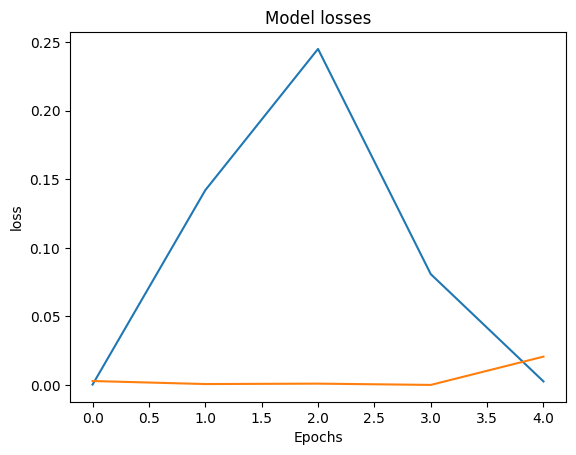

In [53]:
# Convert losses from tensors to scalars
train_losses = [tl.item() for tl in train_losses]
test_losses = [tl.item() for tl in test_losses]

plt.plot(train_losses,label='Train Losses')
plt.plot(test_losses,label='Test Losses')
plt.title('Model losses')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.show()

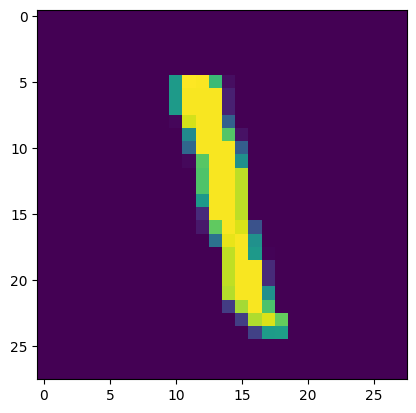

In [68]:
selected_image = 700
plt.imshow(test_data[selected_image][0].reshape(28,28))

In [69]:
#Pass the image through the model
with torch.no_grad():
  pred_val = model(test_data[selected_image][0])
  pred_index = torch.max(pred_val,1)[1]
  print(f'The predicted image value is = {pred_index.item()}')

The predicted image value is = 1
